## Helping people to immigrate

### Purpose
   I would like to make a model that predicts the processing time of the Green card application based on self-petition (EB-1A and NIW categories) and which features influence this decision.

The open source data from trackitt.com Green card tracker and Victoria Chen's list of approved cases (wegreened.com).

In [33]:
import pandas as pd
import numpy as np

a = pd.read_csv('Trackitt_data_table_3.csv') 
df.info()
#df.head(7)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34550 entries, 0 to 34549
Data columns (total 29 columns):
Unnamed: 0               34550 non-null int64
Watch                    0 non-null float64
Username                 34549 non-null object
Comments                 34550 non-null object
More                     0 non-null float64
Nationality              34537 non-null object
Applicant Type           27828 non-null object
Service Center           34548 non-null object
Category                 34545 non-null object
Priority Date            26087 non-null object
Application Filed        32304 non-null object
USCIS Received Date      34165 non-null object
USCIS Notice Date        18653 non-null object
USCIS Receipt Number     7481 non-null object
I-140/485 Filing         34548 non-null object
Processing Type          34548 non-null object
RFE Received?            24690 non-null object
RFE Received Date        4669 non-null object
Reason for RFE           4116 non-null object
RFE Repl

### Conclusion

Data has 29 columns and 34550 rows. This data have a lot of NaN and None values. I should to process data before working with them when it necessary.

In [40]:
pd.set_option('mode.chained_assignment', None)
#df['Category'].value_counts()
# Looking for None values
df['Application Status'].value_counts()
df[df['Approval/Denial Date'].isnull() & df['Application Status'].isnull()].count()
# take the part of data
df['Approval/Denial Date']= pd.to_datetime(df['Approval/Denial Date']) 

df_part = df[(df['Approval/Denial Date'].dt.year == 2019) & (df['Application Status'] == 'approved') & (df['Category'] == 'EB2-NIW')]
# delete 'days' from the column
df_part['Total Processing Time'] = df_part['Total Processing Time'].str.extract('(\d+)') 
df_part['Total Processing Time'] = df_part['Total Processing Time'].replace(np.nan, 0)
df_part['Total Processing Time'] = df_part['Total Processing Time'].astype(int)
df_part.head(8)

,Unnamed: 0,Watch,Username,Comments,More,Nationality,Applicant Type,Service Center,Category,Priority Date,...,RFE Replied Date,Application Status,Approval/Denial Date,Total Processing Time,Most Recent LUD,Days Elapsed,Notes,State,Case Added to Tracker,Last Updated
23,23,NaN,kkkpast,0 comments,NaN,South Korea,primary,Nebraska,EB2-NIW,05/28/2019,...,NaN,approved,2019-12-17,203,NaN,NaN,NaN,Active,18 Dec 2019,06 Jan 2020
58,8,NaN,amirtofighiz,0 comments,NaN,Iran,primary,Texas,EB2-NIW,01/28/2019,...,NaN,approved,2019-12-27,333,12/27/2019,NaN,NaN,Active,29 Dec 2019,29 Dec 2019
60,10,NaN,mohuaa,0 comments,NaN,Bangladesh,primary,Texas,EB2-NIW,12/03/2018,...,NaN,approved,2019-06-14,196,NaN,NaN,Submitted with 12 first a...more,Active,03 Jan 2019,28 Dec 2019
61,11,NaN,proverbialEagl,1 comment,NaN,Bangladesh,primary,Nebraska,EB2-NIW,05/22/2019,...,NaN,approved,2019-12-06,198,NaN,NaN,NaN,Active,11 Sep 2019,27 Dec 2019
70,20,NaN,sharita,0 comments,NaN,Australia,primary,Texas,EB2-NIW,01/15/2019,...,NaN,approved,2019-08-19,221,NaN,NaN,NaN,Active,24 Dec 2019,24 Dec 2019
80,30,NaN,nimar64,0 comments,NaN,Iran,primary,Texas,EB2-NIW,08/03/2018,...,NaN,approved,2019-12-17,501,NaN,NaN,Semi Concurrent. I-485 we...more,Active,04 Jun 2019,20 Dec 2019
96,46,NaN,amin2019,2 comments,NaN,Iran,primary,Nebraska,EB2-NIW,05/10/2019,...,NaN,approved,2019-12-17,225,NaN,NaN,NaN,Active,19 Nov 2019,18 Dec 2019
108,8,NaN,Bahsan,3 comments,NaN,Bangladesh,primary,Nebraska,EB2-NIW,04/05/2019,...,NaN,approved,2019-12-12,254,NaN,NaN,MS in Civil Engg. Working...more,Active,14 Apr 2019,16 Dec 2019


Text(0.5, 0.98, 'The distribution of days for EB2-NIW who approved in 2019')

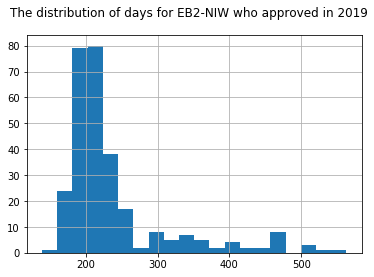

In [61]:
#df_part['Total Processing Time'].hist(bins=50)
import matplotlib.pyplot as plt
df_part1 = df_part[df_part['Total Processing Time']<1000]
df_part1['Total Processing Time'].hist(bins = 20)
med_processing_time = df_part1['Total Processing Time'].median() # 211
plt.suptitle('The distribution of days for EB2-NIW who approved in 2019')

### Conclusion

I got the distribution of processing time of applications which finished in 2019. The median waiting time is 211 days. There is a tail. My purpose is to understand what the reasons of this tail. I can try to find some factors which impacts to the processing time.  

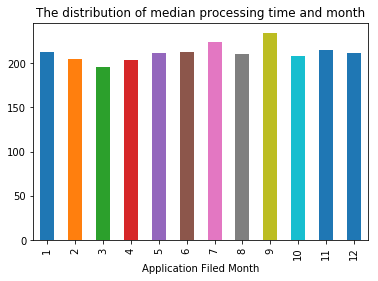

In [70]:
# month/days
df_part['Application Filed']= pd.to_datetime(df_part['Application Filed']) 
df_part['Application Filed Month'] = df_part['Application Filed'].dt.month
df_part['Application Filed Month'].value_counts()

df_group = df_part.groupby('Application Filed Month')['Total Processing Time'].median()
df_group.plot(kind='bar', title='The distribution of median processing time and month')

### Conclusion

We can observe here the uniform distribution. The processing time does not depend on the month of application. 

In [98]:
# service centers
df_part['Service Center'].value_counts()

Nebraska    173
Texas       115
Name: Service Center, dtype: int64

There are servis centers in Nebraska and Texas. What are they other centers? I checked how many people apllied to these cities. I combined Phoenix and Dallas with Texas. National Benefits Center and California are outliers. 

In [88]:
df_part.loc[df_part['Service Center'] == 'Phoenix', 'Service Center'] = 'Texas'
df_part.loc[df_part['Service Center'] == 'Dallas', 'Service Center'] = 'Texas'
index_center = df_part[df_part['Service Center'].isin(['National Benefits Center', 'California'])].index
df_part.drop(index_center, inplace=True)
df_part['Service Center'].value_counts()

Nebraska    173
Texas       115
Name: Service Center, dtype: int64

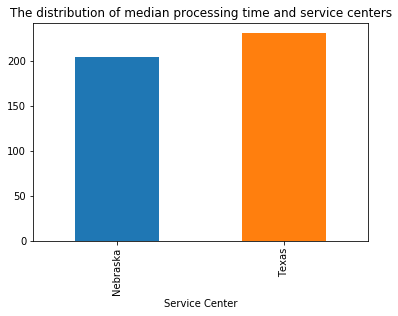

In [89]:
df_service = df_part.groupby('Service Center')['Total Processing Time'].median()
df_service.plot(kind='bar', title='The distribution of median processing time and service centers')

### Conclusion

Texas requires more time. In previous analysis I found that the number of approved applications more than Nebraska. 

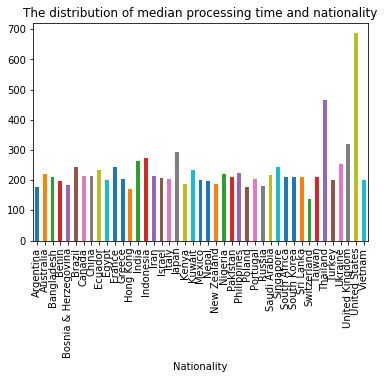

In [95]:
#nationality
df_part['Nationality'].value_counts()
df_nationality = df_part.groupby('Nationality')['Total Processing Time'].median()
df_nationality.plot(kind='bar', title='The distribution of median processing time and nationality')

### Conclusion

I found here the strange values of nationality. It is the United states. I think people incorrectly indicated their nationality. I saw that it was only two person so I can drop those rows with 'nationality' == 'United states".

In this way I did a little analysis and found these factors. Further I guess to observe more years not only 2019. Ideally, it will be better if I have all the possible data of all cases processed. It would allow me to improve my model and do deep research. 
If applicants will use my model  I can be able to evaluate the count of successful cases later and understand how my model was precise.